This is a test notebook and will be deleted later [created by jsbarriosm].

In [1]:
import pandas as pd
import missingno as msno

import matplotlib
import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_excel('../data/raw/er_admission.xlsx', sheet_name = 'Data')
df.head()

,Site,DayWeek_coded,Shift_coded,Arr_Amb,Gender,Age_band,IMD_quintile,Ethnicity,ACSC,Consultant_on_duty,ED bed occupancy,Inpatient_bed_occupancy,Arrival intensity,LAS intensity,LWBS intensity,Stay_length,Last_10_mins,Admission_ALL
0,1.0,1.0,1.0,0.0,1.0,2.0,4.0,1.0,0.0,1.0,1.078947,0.97783,21.0,0.095238,0.058824,78.0,0.0,1.0
1,1.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,1.0,1.736842,0.97783,24.0,0.041667,0.000000,202.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,234.0,1.0,1.0
3,1.0,1.0,1.0,0.0,0.0,0.0,3.0,1.0,0.0,1.0,1.842105,0.97783,28.0,0.250000,0.083333,239.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0,1.0,5.0,6.0,0.0,1.0,1.763158,0.97783,36.0,0.138889,0.000000,227.0,0.0,1.0


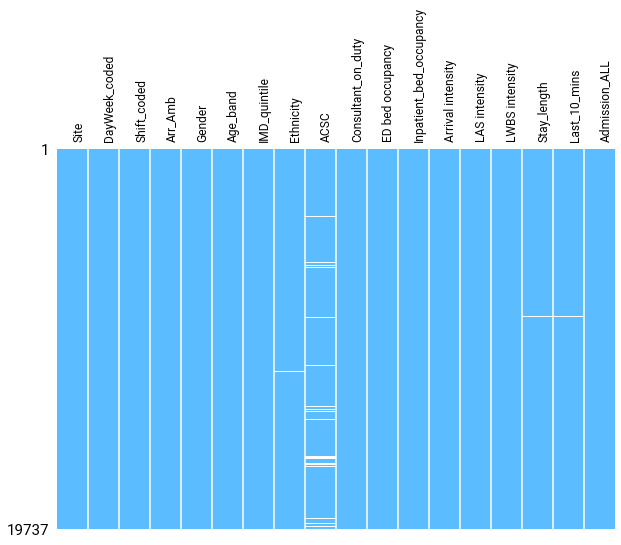

In [38]:
plt.rcParams['font.family'] = 'Roboto'
fig = msno.matrix(df, sparkline=False, figsize=(10,7), fontsize=12, color=(91/255, 189/255, 255/255))
fig.tick_params(axis='x', rotation=90)

In [25]:
def ageband_plot(df):
    '''
    Plots a bar chart from a dataframe loaded by user, that has
    fields 'Age_band' and 'Gender' according to data dictionary
    '''
    plot_df = df[['Age_band', 'Gender']].value_counts().to_frame().reset_index()
    dict_age = {0: '16-34',
                1: '35-64',
                2: '65-84',
                3: '85 and over'}
    plot_df = plot_df.replace({'Age_band': dict_age})
    dict_gen = {0: 'male', 1: 'female'}
    plot_df = plot_df.replace({'Gender': dict_gen})
    plot_df.rename(columns={'Age_band': 'age_band',
                            'Gender': 'gender',
                            0: 'patients_count'}, inplace=True)
    plot=px.bar(plot_df, x='age_band', y='patients_count',
                color='gender', width=600, height=400,
                color_discrete_sequence=px.colors.qualitative.Pastel,
                title='Age band count', text_auto=True)
    return plot

ageband_plot(df)


In [32]:
def imdquintile_plot(df):
    '''
    Plots a bar chart from a dataframe loaded by user, that has
    fields 'IMD_quintile' and 'Gender' according to data dictionary
    '''
    plot_df = df[['IMD_quintile', 'Gender']].value_counts().to_frame().reset_index()
    dict_imd = {0: 'not deprived',
                1: '1st quintile',
                2: '2nd quintile',
                3: '3rd quintile',
                4: '4th quintile',
                5: '5th quintile'}
    plot_df = plot_df.replace({'IMD_quintile': dict_imd})
    dict_gen = {0: 'male', 1: 'female'}
    plot_df = plot_df.replace({'Gender': dict_gen})
    plot_df.rename(columns={'Gender': 'gender',
                            0: 'patients_count'}, inplace=True)
    plot=px.bar(plot_df, x='IMD_quintile', y='patients_count',
                color='gender', width=600, height=400,
                color_discrete_sequence=px.colors.qualitative.Pastel,
                title='Index of multiple deprivation quintiles count', text_auto=True)
    plot.update_xaxes(tickangle=90)
    return plot

imdquintile_plot(df)

In [33]:
def ethnicity_plot(df):
    '''
    Plots a bar chart from a dataframe loaded by user, that has
    fields 'Ethnicity' and 'Gender' according to data dictionary
    '''
    plot_df = df[['Ethnicity', 'Gender']].value_counts().to_frame().reset_index()
    dict_etn = {1: 'asian',
                2: 'black',
                3: 'mixed',
                4: 'other',
                5: 'unknown',
                6: 'white'}
    plot_df = plot_df.replace({'Ethnicity': dict_etn})
    dict_gen = {0: 'male', 1: 'female'}
    plot_df = plot_df.replace({'Gender': dict_gen})
    plot_df.rename(columns={'Ethnicity': 'ethnicity',
                            'Gender': 'gender',
                            0: 'patients_count'}, inplace=True)
    plot=px.bar(plot_df, x='ethnicity', y='patients_count',
                color='gender', width=600, height=400,
                color_discrete_sequence=px.colors.qualitative.Pastel,
                title='Ethnicity count', text_auto=True)
    return plot

ethnicity_plot(df)

In [36]:
def acsc_plot(df):
    '''
    Plots a bar chart from a dataframe loaded by user, that has
    fields 'ACSC' and 'Gender' according to data dictionary
    '''
    plot_df = df[['ACSC', 'Gender']].value_counts().to_frame().reset_index()
    dict_acs = {0: 'True',
                1: 'False',
                3: 'unknown'}
    plot_df = plot_df.replace({'ACSC': dict_acs})
    dict_gen = {0: 'male', 1: 'female'}
    plot_df = plot_df.replace({'Gender': dict_gen})
    plot_df.rename(columns={'Gender': 'gender',
                            0: 'patients_count'}, inplace=True)
    plot=px.bar(plot_df, x='ACSC', y='patients_count',
                color='gender', width=600, height=400,
                color_discrete_sequence=px.colors.qualitative.Pastel,
                title='Presentation because of an ambulatory care sensitive condition', 
                text_auto=True)
    return plot

acsc_plot(df)

In [76]:
def eda1_plot(df):
    '''
    Plots a bar chart from a dataframe loaded by user, that has
    fields 'Age_band' and 'Admission_ALL' according to data dictionary
    '''
    plot_df = df[['Age_band', 'Admission_ALL']].value_counts().to_frame().reset_index()
    dict_age = {0: '16-34',
                1: '35-64',
                2: '65-84',
                3: '85 and over'}
    plot_df = plot_df.replace({'Age_band': dict_age})
    plot_df['Admission_ALL'] = plot_df['Admission_ALL'].astype(str)
    dict_adm = {'0.0': 'discharged', '1.0': 'admitted'}
    plot_df = plot_df.replace({'Admission_ALL': dict_adm})
    plot_df.rename(columns={'Age_band': 'age_band',
                            'Admission_ALL': 'admission_status',
                            0: 'patients_count'}, inplace=True)
    plot=px.bar(plot_df, x='age_band', y='patients_count',
                color='admission_status', width=450, height=400,
                #color_discrete_sequence=px.colors.qualitative.Set3,
                color_discrete_sequence=['#D9D9D9', '#5BBDFF'],
                text_auto=True)
    return plot

fig = eda1_plot(df)

fig.update_layout(  font_family='Roboto', 
                    legend=dict(orientation='h', 
                    yanchor='bottom', y=-0.35, 
                    xanchor='right', x=1.05))
fig.show()

In [87]:
def eda2_plot(df):
    '''
    Plots a violin chart from a dataframe loaded by user, that has
    fields 'Age_band' and 'Stay_length' according to data dictionary
    '''
    plot_df = df[['Age_band', 'Stay_length']].value_counts().to_frame().reset_index()
    dict_age = {0: '16-34',
                1: '35-64',
                2: '65-84',
                3: '85 and over'}
    plot_df = plot_df.replace({'Age_band': dict_age})
    plot_df.rename(columns={'Age_band': 'age_band',
                            'Stay_length': 'stay_length', 
                            0: 'patients_count'}, inplace=True)
    plot=px.violin(plot_df, x='age_band', y='stay_length',  
                width=450, height=400,
                color_discrete_sequence=['#5BBDFF']
                )
    return plot

fig = eda2_plot(df)

fig.update_layout(  font_family='Roboto', 
                    legend=dict(orientation='h', 
                    yanchor='bottom', y=-0.35, 
                    xanchor='right', x=1.05))



fig.show()

In [7]:
def eda3_plot(df):
    '''
    Plots a scatterplot from a dataframe loaded by user, that has
    fields 'ED bed occupancy' and 'Stay_length' according to data dictionary
    '''
    plot_df = df[['ED bed occupancy', 'Stay_length', 'Admission_ALL']]#.value_counts().to_frame().reset_index()
    plot_df['Admission_ALL'] = plot_df['Admission_ALL'].astype(str)
    dict_adm = {'0.0': 'discharged', '1.0': 'admitted'}
    plot_df = plot_df.replace({'Admission_ALL': dict_adm})
    plot_df.rename(columns={'ED bed occupancy': 'ED_bed_occupancy', 
                            'Admission_ALL': 'admission_status',
                            'Stay_length': 'stay_length'}, inplace=True)
    plot=px.scatter(plot_df, x='ED_bed_occupancy', y='stay_length',  
                color='admission_status', 
                width=450, height=400,
                color_discrete_sequence=['#5BBDFF', '#D9D9D9']
                )
    return plot

fig = eda3_plot(df)

fig.update_layout(  font_family='Roboto', 
                    showlegend=False
                    )

fig.update_traces(mode='markers', marker_line_width=0.5)

fig.show()

C:\Users\Juan\AppData\Local\Temp\ipykernel_12776\1756649343.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



AttributeError: 'AxesSubplot' object has no attribute 'update_layout'

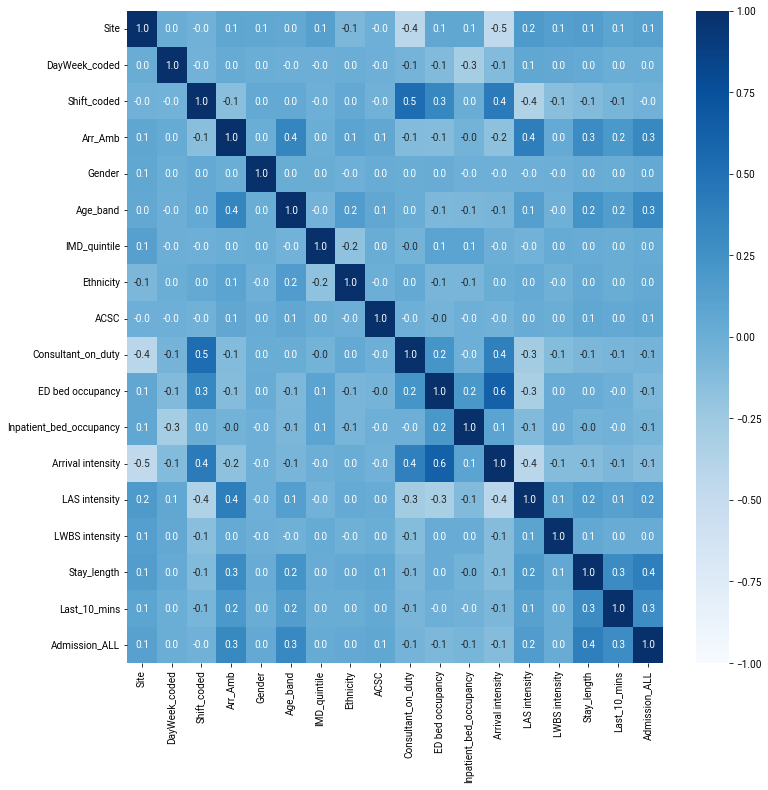

In [120]:
plt.figure(figsize=(12, 10))
fig = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap='Blues', fmt='.1f')

fig.update_layout(font_family='Roboto', 
                    )